In [2]:
import zipfile as zp
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
path =   r"..\ages\ages.csv"
path2 =  r"..\msoa_loneliness.csv"

ages = pd.read_csv(path)
loneliness = pd.read_csv(path2)
loneliness.drop(['objectid', 'msoa11nm', 'msoa11nmw','st_areasha','st_lengths','geometry','loneills_2018_class','Unnamed: 0'	], axis=1,inplace=True)

cols = ['2','7','12','17','22','27','32','37','42','47','52','57','62','67','72','77','82','87','92']
ages[cols] = ages[cols].apply(pd.to_numeric, errors='coerce', axis=1)
ages['65+'] = ages['67']+ages['72']+ages['77']+ages['82']+ages['87']+ages['92']
ages['25-'] = ages ['2']+ages['7']+ages['12']+ages['17']+ages['22']
ages.drop(['2','7','12','17','22','27','32','37','42','47','52','57','62','67','72','77','82','87','92'],axis = 1,inplace=True)




df = loneliness.merge(ages, how='inner', left_on='msoa11cd', right_on='MSOA Code')
df.drop(['msoa11cd'],axis=1,inplace= True)

indexNames = df[ df['loneills_2018'] >=4  ].index
df.drop(indexNames , inplace=True)
print(df.head())

df['All Ages'] = df['All Ages'].apply(lambda x: x.replace(',', ''))
df = df.astype({'All Ages': 'int64'})
df['oldPC'] = df['65+']/df['All Ages']
df['youngPC'] = df['25-']/df['All Ages']
df = df.astype({'oldPC': 'float64'})
df = df.astype({'youngPC': 'float64'})


   loneills_2018  MSOA Code                 MSOA Name All Ages     65+     25-
0       0.610642  E02000001        City of London 001   10,938  1731.0     NaN
1      -0.155306  E02000002  Barking and Dagenham 001    7,726   979.0  2938.0
2       0.326728  E02000003  Barking and Dagenham 002   11,246  1284.0  3832.0
3       0.324374  E02000004  Barking and Dagenham 003    6,646  1008.0  2181.0
4       0.334801  E02000005  Barking and Dagenham 004   10,540   920.0  4098.0


       loneills_2018      youngPC
count    6746.000000  6746.000000
mean        0.010790     0.291659
std         1.212813     0.059006
min        -5.297125     0.119985
25%        -0.680101     0.254685
50%        -0.003611     0.283085
75%         0.742733     0.316532
max         3.982479     0.839012

Pearson's Correlation Coeff:  -0.17546524840343386


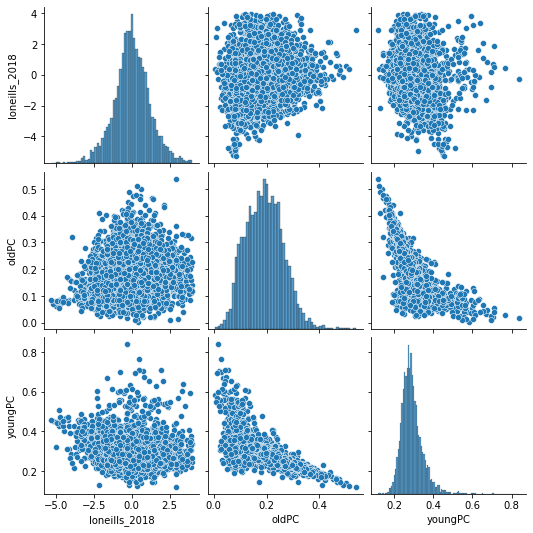

In [14]:
print(df[['loneills_2018', 'youngPC']].describe())

print("\nPearson's Correlation Coeff: ", df['loneills_2018'].corr(df['youngPC']))
sns.pairplot(df.drop(['All Ages','65+','25-'],axis=1))
